# CSCI B505 – Fall 2019
# Lab 2

## Implement a brute-force solution 

In [1]:
def brute_force(A):

    # initialize containers
    arr_size = len(A)
    max_sum = A[0]
    sum = dict()
    
    # scan all the possible combinations and record the max sum with its subarray
    for i in range(arr_size): 
        sum[i] = 0
        
        # scan all the possible combinations
        for j in range(i, arr_size, 1):
            sum[i] += A[j]

            # record the max sum with its subarray
            if max_sum < sum[i]:
                max_sum = sum[i] 
                subarray_left = i
                subarray_right = j
                                
    return subarray_left, subarray_right, max_sum

### Self check

In [2]:
A = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]

In [3]:
brute_force(A)

(7, 10, 43)

## Implement a divide-and-conquer solution

In [6]:
import numpy as np

def find_max_crossing_subarray(A, lo, mi, hi):
    sum = 0
    left_sum = A[lo]
    max_left = lo
    for i in range(mi, lo, -1):
        sum += A[i] 
        if left_sum < sum:
            left_sum = sum
            max_left = i
    
    sum = 0
    right_sum = A[mi+1]
    max_right = hi
    for j in range(mi+1, hi, 1):
        sum += A[j]
        if right_sum < sum:
            right_sum = sum
            max_right = j
    
    return (max_left, max_right, left_sum + right_sum)
        

def find_max_subarray(A, lo, hi): # 边界设定, hi 为最末元素的实际下标
    # 出站设置  # 递归基
    if hi == lo:    
        return (lo, hi, A[lo])  
    
    # 运行机制/递归函数
    else:
        mi = int(np.floor((lo + hi)/2))
        (left_lo, left_hi, left_sum) = find_max_subarray(A, lo, mi)    
        (right_lo, right_hi, right_sum) = find_max_subarray(A, mi + 1, hi)
        (cross_lo, cross_hi, cross_sum) = find_max_crossing_subarray(A, lo, mi, hi)
    
    if left_sum <= right_sum and cross_sum <= right_sum:
        return (right_lo, right_hi, right_sum)
    elif right_sum <= left_sum and cross_sum <= left_sum:
        return (left_lo, left_hi, left_sum)
    else:
        return (cross_lo, cross_hi, cross_sum)  # 返回实际下标

### Self check

In [7]:
find_max_subarray(A, 0, len(A) - 1)

(7, 10, 43)

## Running time

In [11]:
import numpy as np
import pandas as pd
import time

In [9]:
# Load data
numbers = np.loadtxt('input-programming-2.txt')

In [10]:
def get_average_running_time(arr, FUNC, **kwargs):
    running_times = list()
    for i in range(3):
        start = time.time()
        FUNC(A = arr, **kwargs)
        end = time.time()
        delta = end - start
        running_times.append(delta)
    return np.mean(running_times)

### Brute-force method

In [26]:
obs_brute_force = dict()
for n in range(5000, 105000, 5000):
    obs_brute_force[n] = get_average_running_time(numbers[:n], brute_force)

In [27]:
pd.DataFrame({'key':list(obs_brute_force.keys()), 'value': list(obs_brute_force.values())}).to_csv('obs_brute_force.csv')

### Divide-and-conquer method

In [12]:
obs_divide_and_conquer = dict()
for n in range(5000, 105000, 5000):
    obs_divide_and_conquer[n] = get_average_running_time(numbers[:n], find_max_subarray, lo = 0, hi = n-1)

In [22]:
obs_divide_and_conquer

{5000: 0.018796602884928387,
 10000: 0.03842536608378092,
 15000: 0.05871192614237467,
 20000: 0.07810266812642415,
 25000: 0.09900625546773274,
 30000: 0.12126954396565755,
 35000: 0.14180827140808105,
 40000: 0.1598482926686605,
 45000: 0.18506836891174316,
 50000: 0.20367789268493652,
 55000: 0.2275384267171224,
 60000: 0.2449932098388672,
 65000: 0.2629093329111735,
 70000: 0.2902848720550537,
 75000: 0.31073760986328125,
 80000: 0.33490602175394696,
 85000: 0.3645491600036621,
 90000: 0.3835917313893636,
 95000: 0.39992618560791016,
 100000: 0.45177284876505536}

In [25]:
pd.DataFrame({'key':list(obs_divide_and_conquer.keys()), 'value': list(obs_divide_and_conquer.values())}).to_csv('obs_divide_and_conquer.csv')

## Visually plot the measurements 

In [301]:
import matplotlib.pyplot as plt
def plot_measurements(obs1, obs2):
    plt.style.use('default')
    plt.plot(list(obs1.keys()), list(obs1.values()), 'o-')
    plt.plot(list(obs2.keys()), list(obs2.values()), 'o-')
    plt.xlabel('Sample size (n)')
    plt.ylabel('Average running time (seconds)')
    plt.grid()
    plt.title('Visualiztion of average running times between the brute-force and divide-and-conquer methods')
    plt.gcf().set_size_inches(8, 6)

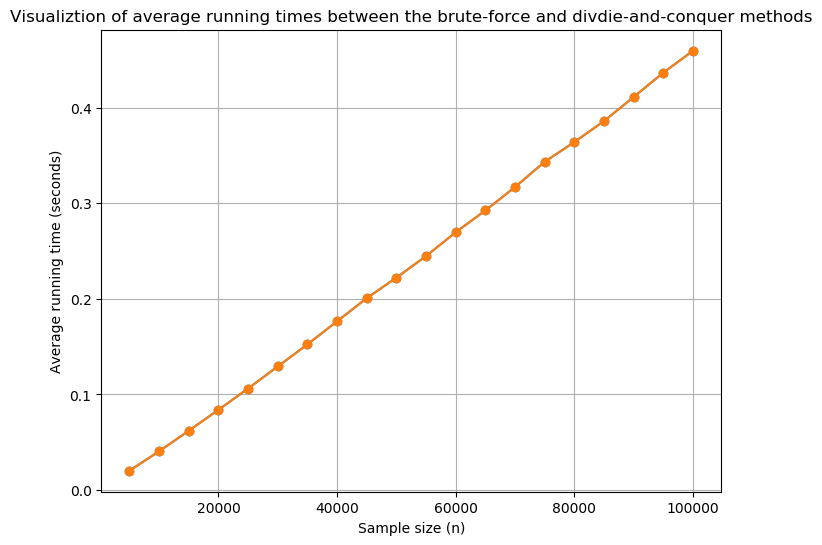

In [306]:
plot_measurements(obs_brute_force, obs_divide_and_conquer)

In [ ]:
obs_divide_and_conquer

In [322]:
find_max_subarray(numbers[:10000], 0, 10000-1)

(1310, 1915, 4572.0)

In [323]:
brute_force(numbers[:10000])

(1273, 1915, 4572.0)

In [328]:
(numbers[1273:1310]).sum()

0.0

In [1]:
import pandas as pd
import numpy as np
bf = pd.read_csv('obs_brute_forceb.csv', )
dc = pd.read_csv('obs_divide_and_conquerb.csv')

In [9]:
pd.DataFrame(np.c_[bf, dc])

,0,1,2,3,4,5
0,0.0,500.0,0.026844,0.0,500.0,0.002148
1,1.0,1000.0,0.103505,1.0,1000.0,0.004473
2,2.0,1500.0,0.234180,2.0,1500.0,0.006483
3,3.0,2000.0,0.417960,3.0,2000.0,0.008419
4,4.0,2500.0,0.654436,4.0,2500.0,0.010917
5,5.0,3000.0,0.939576,5.0,3000.0,0.013153
6,6.0,3500.0,1.270419,6.0,3500.0,0.015461
7,7.0,4000.0,1.667336,7.0,4000.0,0.017999
8,8.0,4500.0,2.120564,8.0,4500.0,0.020993
9,9.0,5000.0,2.614974,9.0,5000.0,0.022845
